### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [1]:
#Lendo
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/ocarane/machine_learning/main/diabetes%20-%20diabetes.csv.csv')
dados.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,167.000,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,248.000,1
3,70,45,543,30.5,158.000,1
4,60,23,846,30.1,398.000,1


In [2]:
#Separando
X = dados.drop('diabetes', axis = 1) #Explicativas ou Features
y = dados['diabetes'] #Alvo ou Class

### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [3]:
#Dividindo treino e teste
from sklearn.model_selection import train_test_split
SEED = 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED)

### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

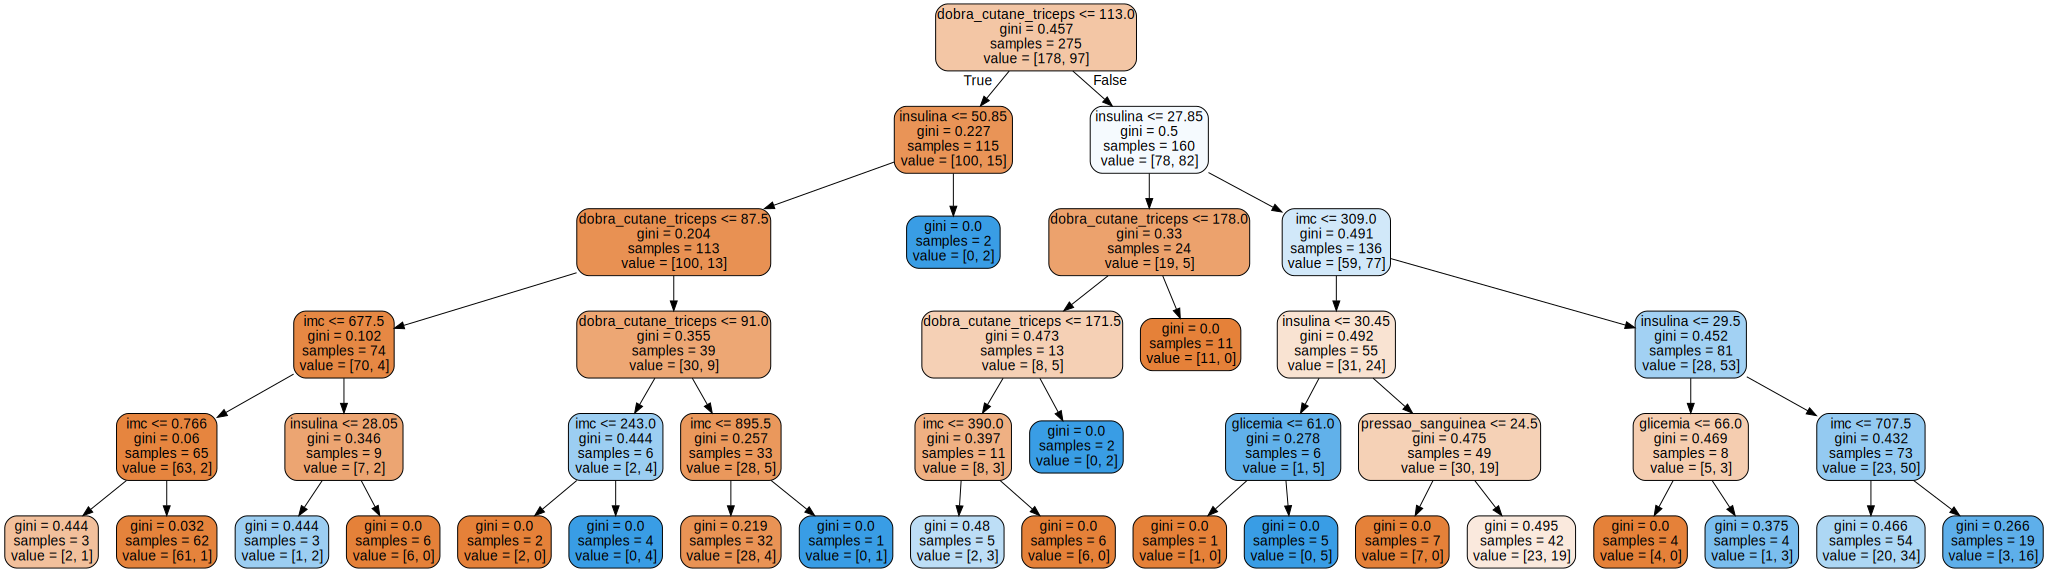

In [4]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz

dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, y_train)

#Plotando o gráfico
dot_data = export_graphviz(dtc, out_file=None, feature_names=X.columns, filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [5]:
#Acurácia DTC
dtc_accuracy = dtc.score(X_test, y_test)
dtc_accuracy

0.6974789915966386

In [6]:
#Random Forest
rfc = RandomForestClassifier(max_depth = 5, random_state=SEED)
rfc.fit(X_train, y_train)

#Acurácia RFC
rfc_accuracy = rfc.score(X_test, y_test)
rfc_accuracy

0.7647058823529411

### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

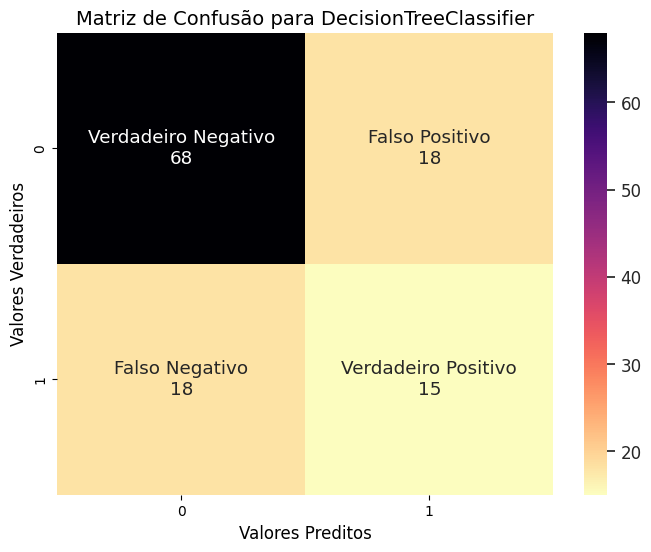

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Modelo Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth=5, random_state=SEED)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

#Matriz de confusão
cm_dtc = confusion_matrix(y_test, dtc_pred, labels=dtc.classes_)

# Função para gerar matriz de confusão customizada
def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]

    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)

    plt.figure(figsize=(8, 6))
    ax = plt.subplot()
    sns.set(font_scale=1.1)

    #Heatmap da matriz de confusão
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias, yticklabels=categorias)

    label_font = {'size': '12'}
    ax.set_xlabel('Valores Preditos', fontdict=label_font)
    ax.set_ylabel('Valores Verdadeiros', fontdict=label_font)
    ax.set_title('Matriz de Confusão para DecisionTreeClassifier', fontdict={'size': '14'})

    ax.tick_params(axis='both', which='major', labelsize=10)

categorias = ["0", "1"]
labels = ['Verdadeiro Negativo', 'Falso Positivo', 'Falso Negativo', 'Verdadeiro Positivo']

gerando_matriz(cm_dtc, labels, categorias, cmap="magma_r")
plt.show()

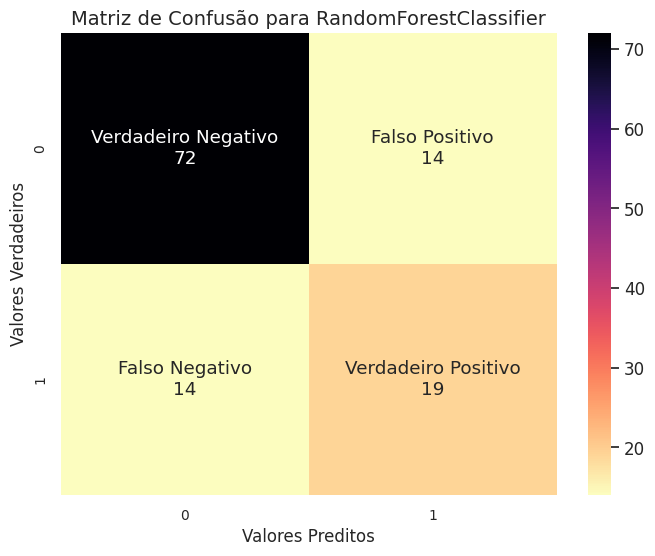

In [8]:
#Modelo Random Forest Classifier
rfc = RandomForestClassifier(max_depth=5, random_state=SEED)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

#Matriz de confusão
cm_rfc = confusion_matrix(y_test, rfc_pred, labels=rfc.classes_)

def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):

    group_counts = [f"{value}" for value in matriz_confusao.flatten()]

    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)

    plt.figure(figsize=(8, 6))
    ax = plt.subplot()
    sns.set(font_scale=1.1)

    # Heatmap da matriz de confusão
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias, yticklabels=categorias)

    label_font = {'size': '12'}
    ax.set_xlabel('Valores Preditos', fontdict=label_font)
    ax.set_ylabel('Valores Verdadeiros', fontdict=label_font)
    ax.set_title('Matriz de Confusão para RandomForestClassifier', fontdict={'size': '14'})

    ax.tick_params(axis='both', which='major', labelsize=10)

categorias = ["0", "1"]
labels = ['Verdadeiro Negativo', 'Falso Positivo', 'Falso Negativo', 'Verdadeiro Positivo']

gerando_matriz(cm_rfc, labels, categorias, cmap="magma_r")
plt.show()

### Desafio 5

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados

In [9]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [10]:
dtc_pred = dtc.predict(X_test)
rfc_pred = rfc.predict(X_test)

#Descobrindo a acurácia, o recall, a precisãõ e o F1-Score do Decision Tree
print(f"Acurácia do Decision Tree: {accuracy_score(y_test, dtc.predict(X_test)):.2f}")
print(f"Recall do Decision Tree: {recall_score(y_test, dtc.predict(X_test)):.2f}")
print(f"Precisão do Decision Tree: {precision_score(y_test, dtc.predict(X_test)):.2f}")
print(f"F1-Score do Decision Tree: {f1_score(y_test, dtc.predict(X_test)):.2f}")

print("--------------------------------")

#Descobrindo a acurácia, o recall, a precisãõ e o F1-Score do Random Forest
print(f"Acurácia do Random Forest: {accuracy_score(y_test, rfc.predict(X_test)):.2f}")
print(f'Recall do Random Forest: {recall_score(y_test, rfc.predict(X_test)):.2f}')
print(f'Precisão do Random Forest: {precision_score(y_test, rfc.predict(X_test)):.2f}')
print(f'F1-Score do Random Forest: {f1_score(y_test, rfc.predict(X_test)):.2f}')

Acurácia do Decision Tree: 0.70
Recall do Decision Tree: 0.45
Precisão do Decision Tree: 0.45
F1-Score do Decision Tree: 0.45
--------------------------------
Acurácia do Random Forest: 0.76
Recall do Random Forest: 0.58
Precisão do Random Forest: 0.58
F1-Score do Random Forest: 0.58


### Desafio 6

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

dtc_probs = dtc.predict_proba(X_test)[:, 1]
rfc_probs = rfc.predict_proba(X_test)[:, 1]

fpr_dtc, tpr_dtc, _ = roc_curve(y_test, dtc_probs)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc_probs)

auc_dtc = auc(fpr_dtc, tpr_dtc)
auc_rfc = auc(fpr_rfc, tpr_rfc)

print(f"AUC para Decision Tree: {auc_dtc:.2f}")
print(f"AUC para Random Forest: {auc_rfc:.2f}")

AUC para Decision Tree: 0.69
AUC para Random Forest: 0.79


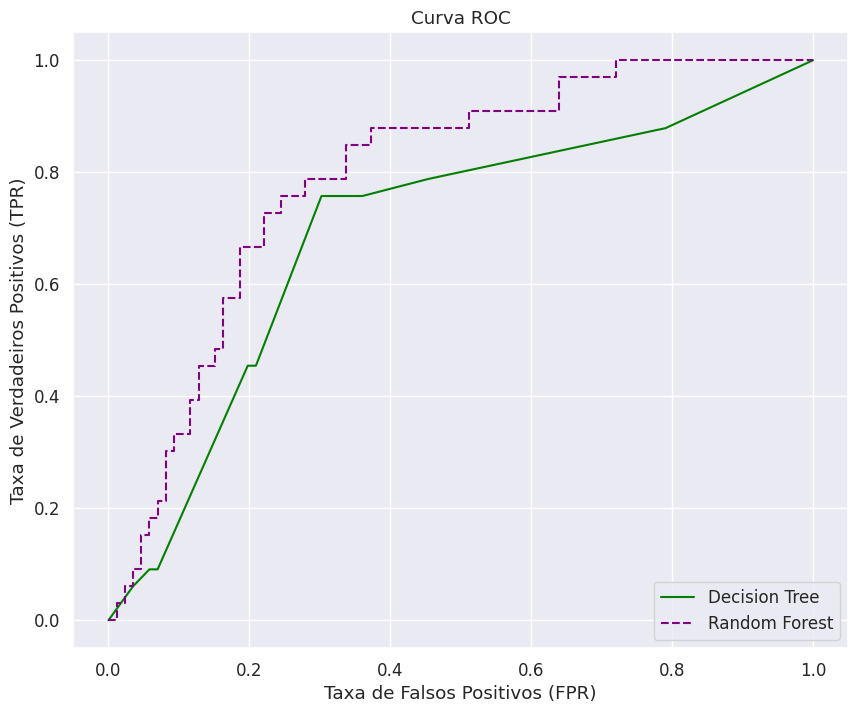

In [12]:
# 1. Plotando as curvas ROC no mesmo gráfico
plt.figure(figsize=(10, 8))
plt.plot(fpr_dtc, tpr_dtc, label=f'Decision Tree', linestyle='-', color='green')
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest', linestyle='--', color='purple')

# Configurações do gráfico ROC
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Desafio 7

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

Métrica AP do Decision Tree: 0.43
Métrica AP do Random Forest: 0.52


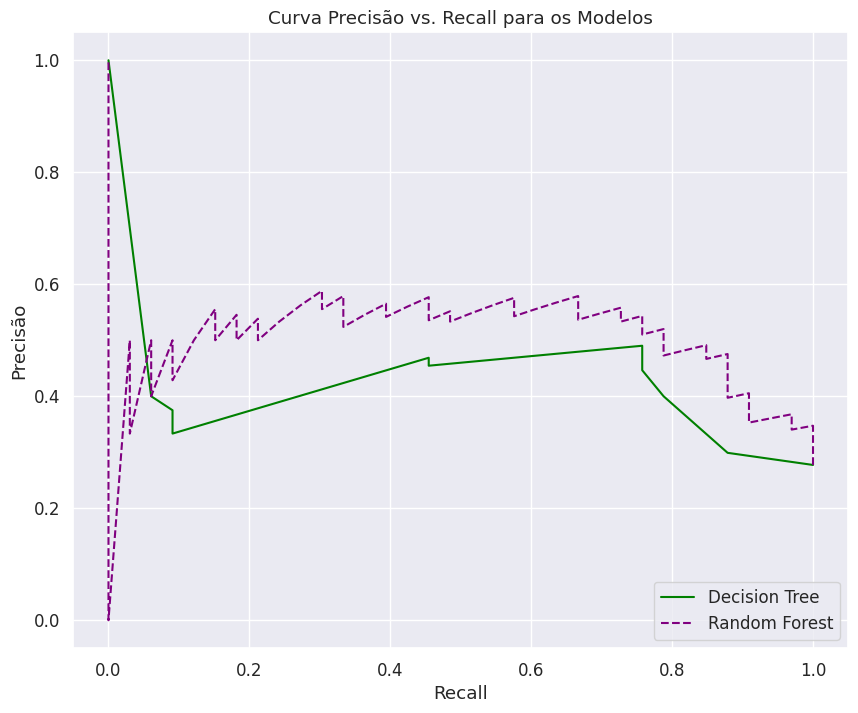

In [13]:
from sklearn.metrics import precision_recall_curve, average_precision_score

dtc_probs = dtc.predict_proba(X_test)[:, 1]
rfc_probs = rfc.predict_proba(X_test)[:, 1]

precision_dtc, recall_dtc, _ = precision_recall_curve(y_test, dtc_probs)
precision_rfc, recall_rfc, _ = precision_recall_curve(y_test, rfc_probs)

ap_dtc = average_precision_score(y_test, dtc_probs)
ap_rfc = average_precision_score(y_test, rfc_probs)

print(f"Métrica AP do Decision Tree: {ap_dtc:.2f}")
print(f"Métrica AP do Random Forest: {ap_rfc:.2f}")

# Plotando a curva de precisão vs. recall no mesmo gráfico
plt.figure(figsize=(10, 8))
plt.plot(recall_dtc, precision_dtc, label=f'Decision Tree', linestyle='-', color='green')
plt.plot(recall_rfc, precision_rfc, label=f'Random Forest', linestyle='--', color='purple')

plt.xlabel('Recall')
plt.ylabel('Precisão')
plt.title('Curva Precisão vs. Recall para os Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Desafio 8

Gere os relatórios de métricas dos modelos de classificação gerados.

In [16]:
from sklearn.metrics import classification_report
from tabulate import tabulate

# Lista de modelos e nomes
models = [dtc, rfc]
model_names = ['Decision Tree', 'Random Forest']

# Gerando os relatórios de classificação para cada modelo e formatando em tabela
for model, name in zip(models, model_names):
    print(f"Relatório de Classificação para o modelo {name}:")

    # Gerando o relatório de classificação como dicionário
    report_dict = classification_report(y_test, model.predict(X_test), output_dict=True)

    # Convertendo o relatório para um formato tabulado
    report_table = []

    # Preenchendo a tabela com as métricas
    for label, metrics in report_dict.items():
        if label in ['accuracy', 'macro avg', 'weighted avg']:
            continue  # Ignorar essas linhas para um formato mais limpo

        row = [label] + [metrics[metric] for metric in ['precision', 'recall', 'f1-score', 'support']]
        report_table.append(row)

    # Adicionando precisão, recall e f1-score
    averages = ['macro avg', 'weighted avg']
    for avg in averages:
        avg_row = [avg] + [report_dict[avg][metric] for metric in ['precision', 'recall', 'f1-score', 'support']]
        report_table.append(avg_row)

    # Exibindo a tabela com tabulate
    headers = ['Classe', 'Precisão', 'Recall', 'F1-Score', 'Suporte']
    print(tabulate(report_table, headers=headers, tablefmt='grid'))
    print("--------------------------------------------------")


Relatório de Classificação para o modelo Decision Tree:
+--------------+------------+----------+------------+-----------+
| Classe       |   Precisão |   Recall |   F1-Score |   Suporte |
+==============+============+==========+============+===========+
| 0            |   0.790698 | 0.790698 |   0.790698 |        86 |
+--------------+------------+----------+------------+-----------+
| 1            |   0.454545 | 0.454545 |   0.454545 |        33 |
+--------------+------------+----------+------------+-----------+
| macro avg    |   0.622622 | 0.622622 |   0.622622 |       119 |
+--------------+------------+----------+------------+-----------+
| weighted avg |   0.697479 | 0.697479 |   0.697479 |       119 |
+--------------+------------+----------+------------+-----------+
--------------------------------------------------
Relatório de Classificação para o modelo Random Forest:
+--------------+------------+----------+------------+-----------+
| Classe       |   Precisão |   Recall |   F1

### Desafio 9

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



In [20]:
def calcular_intervalo_confianca(desempenhos, nome_modelo):
  media = np.mean(desempenhos)
  desvio_padrao = np.std(desempenhos)
  intervalo = (media - 2 * desvio_padrao, media + 2 * desvio_padrao)
  print(f'Intervalo de confiança ("{nome_modelo}"): [{intervalo[0]:.2f}, {intervalo[1]:.2f}]')


### Desafio 10

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [24]:
from sklearn.model_selection import KFold, cross_val_score

# Configuração da validação cruzada
kf = KFold(n_splits=10, shuffle=True, random_state=SEED)

# Avaliação dos modelos com validação cruzada
cv_scores_dtc = cross_val_score(dtc, X_train, y_train, cv=kf)
cv_scores_rfc = cross_val_score(rfc, X_train, y_train)

# Calculando o intervalo de confiança
calcular_intervalo_confianca(cv_scores_dtc,dtc)
calcular_intervalo_confianca(cv_scores_rfc,rfc)

Intervalo de confiança ("DecisionTreeClassifier(max_depth=5, random_state=5)"): [0.44, 0.83]
Intervalo de confiança ("RandomForestClassifier(max_depth=5, random_state=5)"): [0.64, 0.69]


### Desafio 11

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [25]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)
cv_scores_dtc = cross_val_score(dtc, X_train, y_train, cv=skf, scoring='f1')
cv_scores_rfc = cross_val_score(rfc, X_train, y_train, cv=skf, scoring='f1')

calcular_intervalo_confianca(cv_scores_dtc,dtc)
calcular_intervalo_confianca(cv_scores_rfc,rfc)


Intervalo de confiança ("DecisionTreeClassifier(max_depth=5, random_state=5)"): [0.06, 0.80]
Intervalo de confiança ("RandomForestClassifier(max_depth=5, random_state=5)"): [0.12, 0.79]


### Desafio 12

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


In [26]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

cv_scores_dtc = cross_val_score(dtc, X_train, y_train, cv=loo)
cv_scores_rfc = cross_val_score(rfc, X_train, y_train, cv=loo)

print(f"Acurácia média do Decision Tree: {cv_scores_dtc.mean():.2f}")
print(f"Acurácia média do Random Forest: {cv_scores_rfc.mean():.2f}")

Acurácia média do Decision Tree: 0.65
Acurácia média do Random Forest: 0.63


### Desafio 13

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

<ipython-input-30-0969965e4f21>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes', data=dados, palette='viridis')


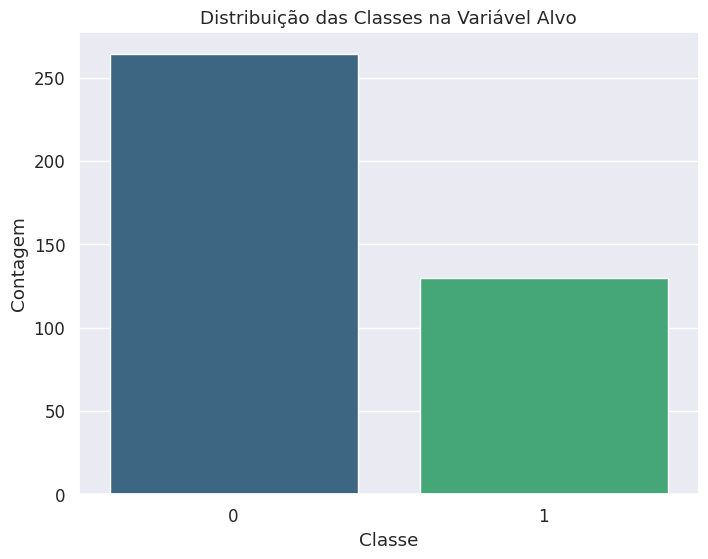

In [30]:
from tabulate import tabulate
import seaborn as sns

# Visualização com um gráfico de contagem
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=dados, palette='viridis')
plt.title('Distribuição das Classes na Variável Alvo')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

### Desafio 14

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [41]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Criando o pipeline com SMOTE e o modelo (substitua 'modelo' pelo seu modelo)
pipeline = Pipeline([('oversampling', SMOTE(random_state=SEED)), ('modelo', rfc)])

# Calculando a média do F1-Score com validação cruzada estratificada
cv_score_rfc = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='f1')
media_f1_score_rfc = np.mean(cv_score_rfc)


print(f"Média do F1-Score com SMOTE e validação cruzada para o modelo Random Forest Classifier: {media_f1_score_rfc:.2f}")

Média do F1-Score com SMOTE e validação cruzada para o modelo Random Forest Classifier: 0.62


### Desafio 15

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [40]:
from imblearn.under_sampling import NearMiss

pipeline = Pipeline([
    ('undersampling', NearMiss(version=3)),
    ('modelo', rfc)
])

cv_scores = cross_val_score(pipeline, X_train, y_train, cv=skf, scoring='f1')
media_f1_score = np.mean(cv_scores)

print(f"Média do F1-Score com NearMiss e validação cruzada: {media_f1_score:.2f}")


Média do F1-Score com NearMiss e validação cruzada: 0.59


### Desafio 16

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.

In [43]:
from sklearn.metrics import classification_report


pipeline = Pipeline([('oversampling', SMOTE(random_state=SEED)), ('modelo', rfc)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('classification_report.csv')

              precision    recall  f1-score   support

           0       0.90      0.70      0.78        86
           1       0.50      0.79      0.61        33

    accuracy                           0.72       119
   macro avg       0.70      0.74      0.70       119
weighted avg       0.79      0.72      0.74       119

